In [ ]:
# Extracting roads from OSM
# #https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb

# https://automating-gis-processes.github.io/2018/notebooks/L6/network-analysis.html

In [122]:
import geopandas as gpd
import osmnx as ox
from osgeo import ogr
import geopandas as gpd
import pandas as pd
from shapely import geometry
from shapely.geometry import box
from pyproj import Proj
from osgeo import ogr
import pandas as pd
import geopandas as gpd

%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.10'

Bounding Box Data
      east     north      south      west  \
0  8.24652  46.89863  46.888895  8.233058   

                                            geometry  
0  POLYGON ((8.246519985700001 46.88889516, 8.246...  


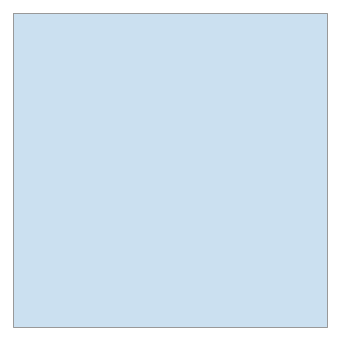

In [125]:
# Define bounding box
bb  = [{
    'north': 46.89862993,
    'west': 8.2330575073,
    'south': 46.88889516,
    'east': 8.2465199857}]

# https://gis.stackexchange.com/questions/285336/convert-polygon-bounding-box-to-geodataframe
df_bb = pd.DataFrame.from_dict(bb)

# Get first entry
bb = bb[0]

#Get shapefile polygon of bbox
bb_polygon = box(bb['north'], bb['south'], bb['east'], bb['west'])

# Create geodataframe
gdf_bb = gpd.GeoDataFrame(df_bb, geometry=[bb_polygon])
print("Bounding Box Data")
print(gdf_bb)

# Assign coordinate system https://spatialreference.org/ref/epsg/wgs-84-utm-zone-32n/
gdf_bb.crs = {'init': 'epsg:32632'}

# convert crs
#gdf_bb_projected = ox.project_gdf(gdf_bb, to_crs={'proj':'longlat', 'epsg':'4326','ellps':'WGS84', 'datum':'WGS84'})

# Save a GeoDataFrame of place shapes or footprints as an ESRI shapefile.
#gdf_bb['gdf_name'] = 'test' # Assign name attribute
#ox.save_gdf_shapefile(gdf_bb)

fig, ax = ox.plot_shape(gdf_bb)

# Convert to shapely polygon
poly = geometry.Polygon([
        [bb['north'], bb['west']],
        [bb['north'], bb['east']],
        [bb['south'], bb['east']],
        [bb['south'], bb['west']]])


All columns of edges dataframe: ['highway', 'lat', 'lon', 'osmid', 'x', 'y', 'geometry']
Current projection (crs): +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs


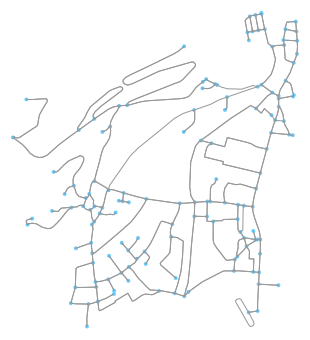

In [124]:
# create network from that bounding box
# https://wiki.openstreetmap.org/wiki/Key:network
# network type:   driving, walking, biking, route

# Return networkx graph
graph_osm = ox.graph_from_bbox(
    bb['north'],
    bb['south'],
    bb['east'],
    bb['west'],
    network_type='all_private')

# Project graph to UTM crs (#onvert from OSM coordinate system to UTM system)
graph_UTM = ox.project_graph(graph_osm) 

# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph_UTM, nodes=False, edges=True)
nodes = edges = ox.graph_to_gdfs(graph_UTM, nodes=True, edges=False)

print("All columns of edges dataframe: {}".format(list(edges.columns))) # Get columns u: The first node of edge v: The last node of edge
#print(edges['maxspeed'].describe())
print("Current projection (crs): {}".format(edges.crs))

fig, ax = ox.plot_graph(graph_UTM)

In [126]:
# Retrieve buildings within polygon
buildings = ox.footprints.create_footprints_gdf(
    north=bb['north'],
    south=bb['south'],
    east=bb['east'],
    west=bb['west'],
    footprint_type='building')

print("Buildings")
print(buildings)

Buildings


In [9]:
# Use a polygon to get road network
'''
calif = gpd.read_file('input_data/ZillowNeighborhoods-CA')
mission_district = calif[(calif['CITY']=='San Francisco') & (calif['NAME']=='Mission')]
polygon = mission_district['geometry'].iloc[0]
G6 = ox.graph_from_polygon(polygon, network_type='drive_service')
G6_projected = ox.project_graph(G6)
fig, ax = ox.plot_graph(G6_projected)
'''

"\ncalif = gpd.read_file('input_data/ZillowNeighborhoods-CA')\nmission_district = calif[(calif['CITY']=='San Francisco') & (calif['NAME']=='Mission')]\npolygon = mission_district['geometry'].iloc[0]\nG6 = ox.graph_from_polygon(polygon, network_type='drive_service')\nG6_projected = ox.project_graph(G6)\nfig, ax = ox.plot_graph(G6_projected)\n"